In [19]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

importing the dataset


In [2]:
upi_transactions = pd.read_csv('/content/UPIFraudDetection.csv')

In [3]:
upi_transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
upi_transactions.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
56198,9,CASH_OUT,16024.60,C1088493558,442118.00,426093.40,C1084323592,5818.0,8074.67,0.0,0.0
56199,9,PAYMENT,20502.92,C410885495,3073.00,0.00,M1731153077,0.0,0.00,0.0,0.0
56200,9,CASH_IN,175858.36,C702220078,290164.69,466023.05,C65594254,24083.0,0.00,0.0,0.0
56201,9,PAYMENT,2955.89,C1632500548,466023.05,463067.17,M363811903,0.0,0.00,0.0,0.0
56202,9,PAYMEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
upi_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  56202 non-null  float64
 8   newbalanceDest  56202 non-null  float64
 9   isFraud         56202 non-null  float64
 10  isFlaggedFraud  56202 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.7+ MB


checking the number of missing values in the each column

In [6]:
upi_transactions.isnull().sum()

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [8]:
upi_transactions['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN', 'PAYMEN'],
      dtype=object)

In [10]:
dict = {'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5}
upi_transactions['type'] = upi_transactions['type'].map(dict)


In [11]:
upi_transactions.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2.0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,2.0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,4.0,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,1.0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,2.0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [12]:
upi_transactions.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,56203.000000,56202.000000,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,56202.000000,56202.0
mean,7.624451,2.129586,1.598924e+05,7.322726e+05,7.464767e+05,8.391746e+05,1.169835e+06,0.001779,0.0
std,1.999414,0.965751,3.293750e+05,2.184696e+06,2.222611e+06,2.407619e+06,2.893515e+06,0.042145,0.0
min,1.000000,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.000000,8.135660e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,2.000000,3.623700e+04,1.788471e+04,0.000000e+00,5.114860e+03,2.167320e+03,0.000000,0.0
75%,9.000000,3.000000,1.918409e+05,1.401448e+05,1.534157e+05,4.722510e+05,8.965790e+05,0.000000,0.0
max,9.000000,5.000000,1.000000e+07,2.854724e+07,2.861740e+07,3.017978e+07,3.197699e+07,1.000000,0.0


In [13]:
upi_transactions.drop(['step','isFlaggedFraud'],axis =1,inplace = True)

In [14]:
upi_transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,2.0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,2.0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,4.0,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1.0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,2.0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


no requirement of the sender and the reciever column for analysis so dropping those columns

In [15]:
upi_transactions.drop(['nameOrig','nameDest'],axis = 1,inplace=True)

In [16]:
upi_transactions.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2.0,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,2.0,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,4.0,181.00,181.0,0.00,0.0,0.0,1.0
3,1.0,181.00,181.0,0.00,21182.0,0.0,1.0
4,2.0,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [17]:
upi_transactions.tail()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
56198,1.0,16024.60,442118.00,426093.40,5818.0,8074.67,0.0
56199,2.0,20502.92,3073.00,0.00,0.0,0.00,0.0
56200,3.0,175858.36,290164.69,466023.05,24083.0,0.00,0.0
56201,2.0,2955.89,466023.05,463067.17,0.0,0.00,0.0
56202,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='amount'>

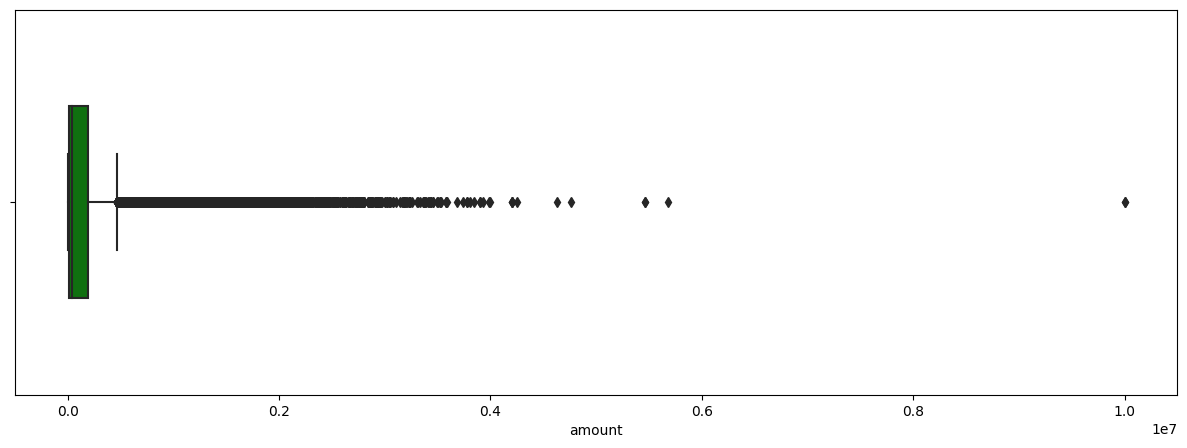

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(x=upi_transactions.amount,color='green',width=0.5)

<Axes: xlabel='oldbalanceOrg'>

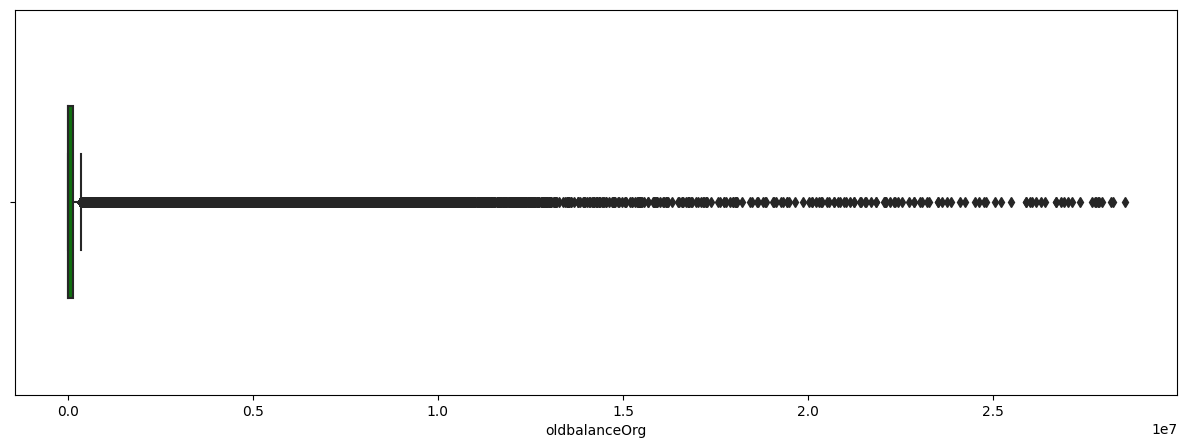

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(x = upi_transactions.oldbalanceOrg,color='green',width=0.5)

<Axes: xlabel='newbalanceOrig'>

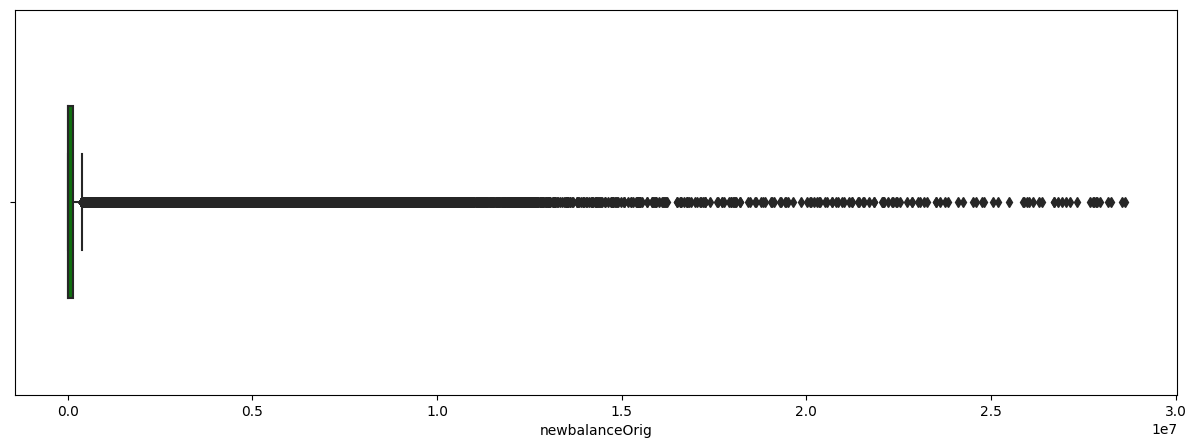

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(x = upi_transactions.newbalanceOrig,color='green',width=0.5)

<Axes: xlabel='oldbalanceDest'>

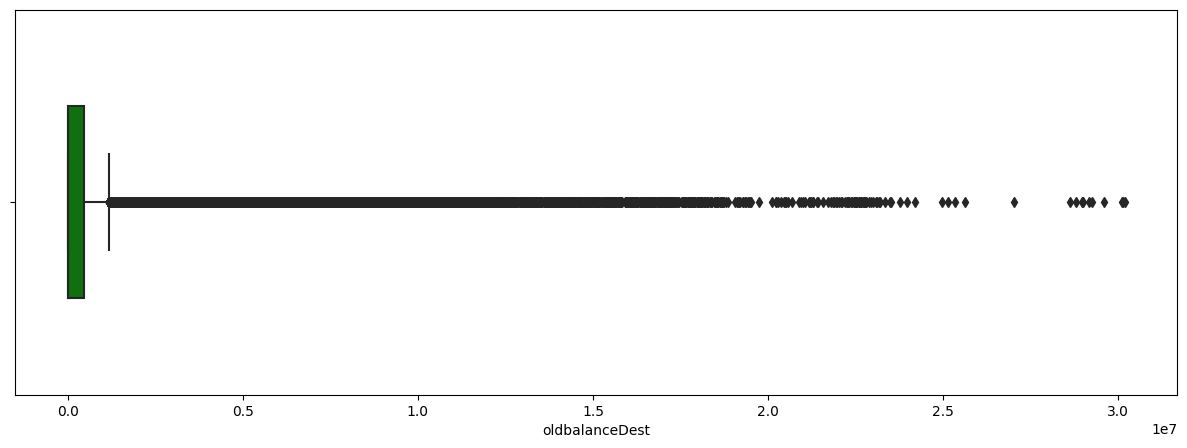

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(x = upi_transactions.oldbalanceDest,color='green',width=0.5)

<Axes: xlabel='newbalanceDest'>

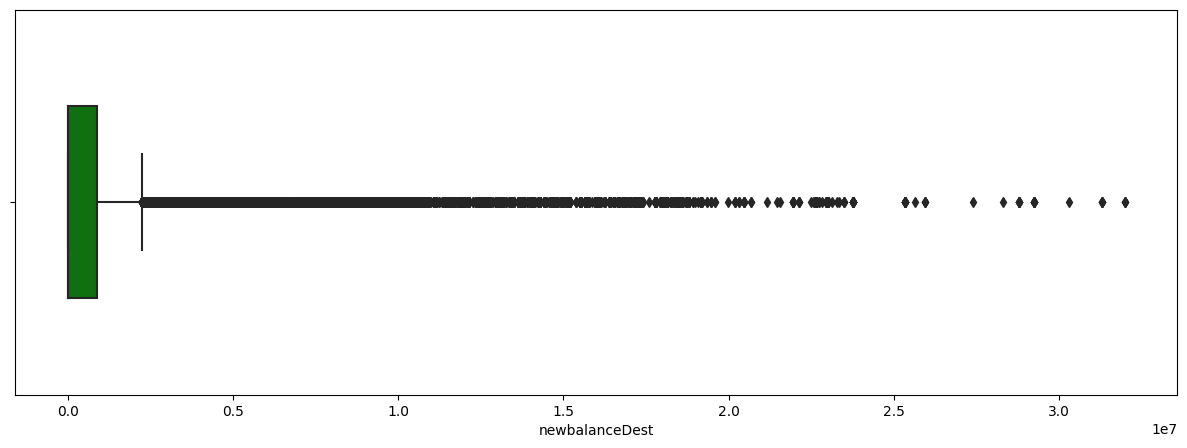

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(x = upi_transactions.newbalanceDest,color='green',width=0.5)

Exploratory data analysis procedure

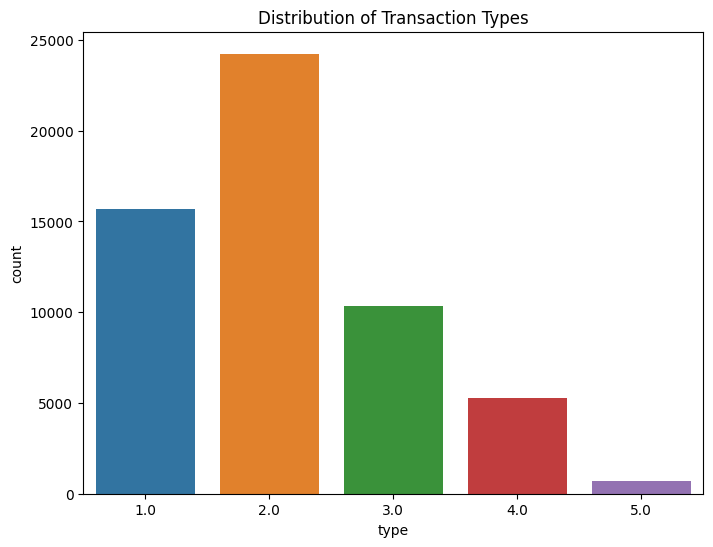

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=upi_transactions)
plt.title('Distribution of Transaction Types')
plt.show()

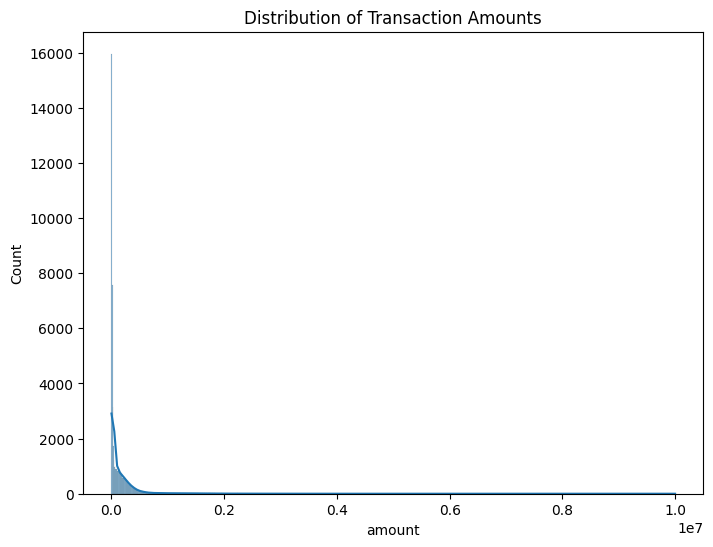

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data=upi_transactions, x='amount', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

In [30]:
upi_transactions.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2.0,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,2.0,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,4.0,181.00,181.0,0.00,0.0,0.0,1.0
3,1.0,181.00,181.0,0.00,21182.0,0.0,1.0
4,2.0,11668.14,41554.0,29885.86,0.0,0.0,0.0


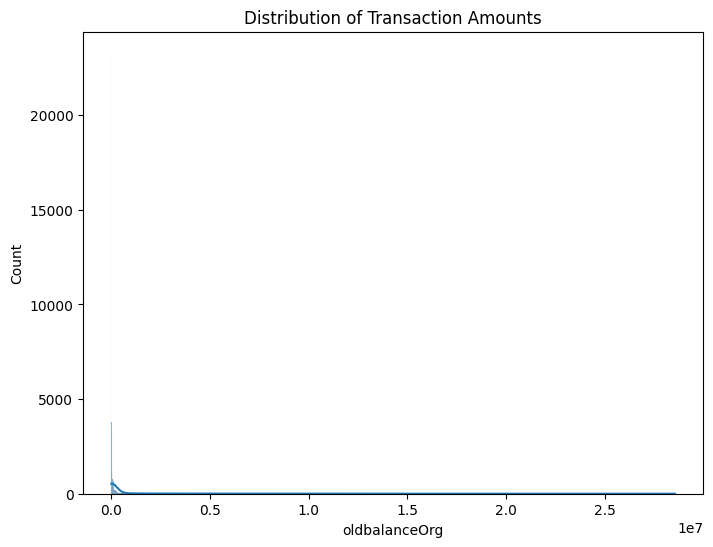

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data=upi_transactions, x='oldbalanceOrg', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

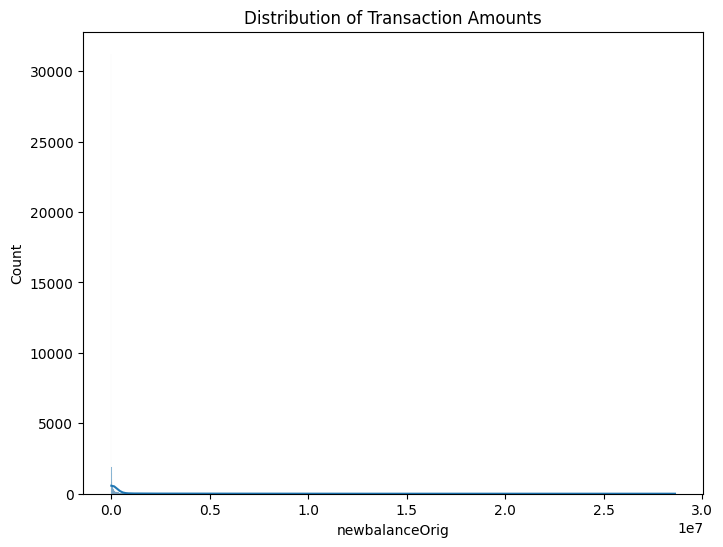

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(data=upi_transactions, x='newbalanceOrig', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

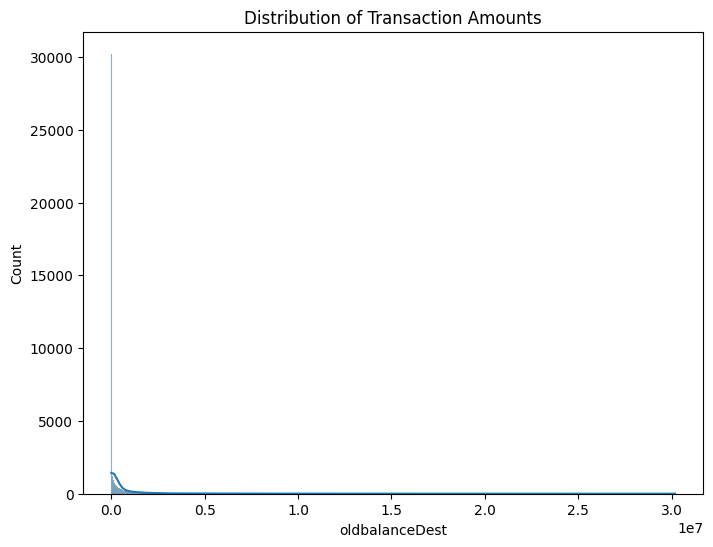

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(data=upi_transactions, x='oldbalanceDest', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

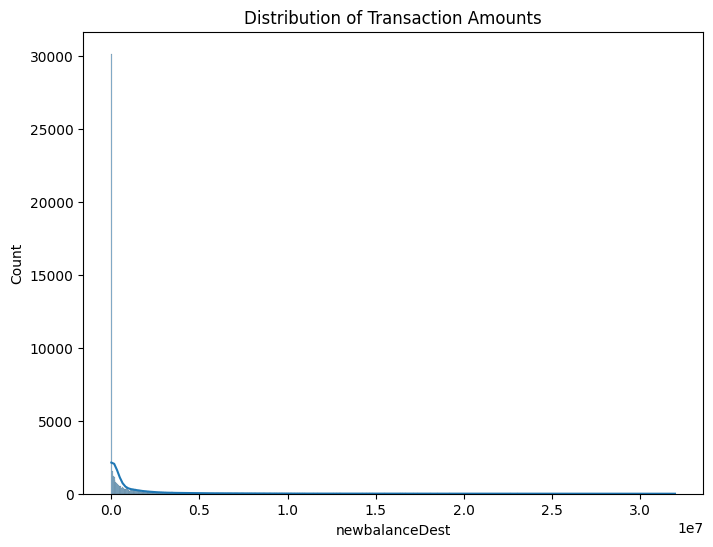

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(data=upi_transactions, x='newbalanceDest', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

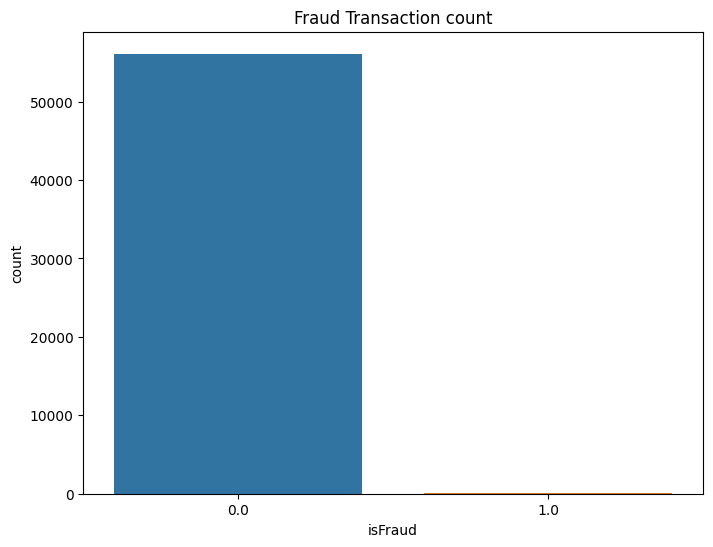

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x='isFraud', data=upi_transactions)
plt.title('Fraud Transaction count')
plt.show()

<Axes: >

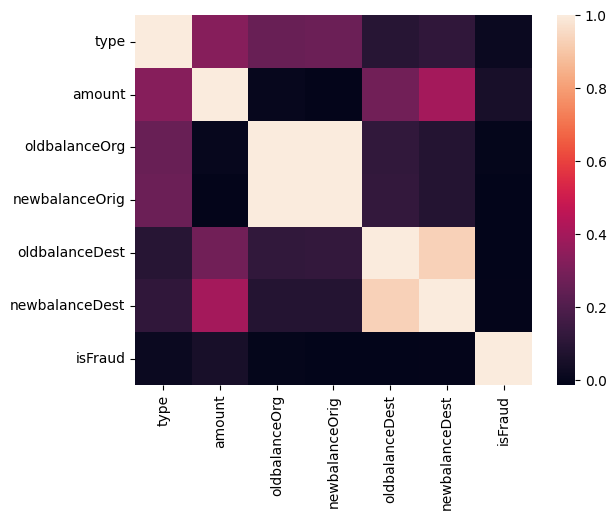

In [36]:
sns.heatmap(upi_transactions.corr())
#using correlation

In [39]:
columns = upi_transactions.columns.tolist()
columns = [c for c in columns if c not in ["isFraud"]]
target = "isFraud"
state = np.random.RandomState(42)
x = upi_transactions[columns]
y = upi_transactions[target]
x_outliers = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
print(x.shape)
print(y.shape)

(56203, 6)
(56203,)


In [41]:
fraud =upi_transactions[upi_transactions['isFraud']==1]
legal_transction = upi_transactions[upi_transactions['isFraud']==0]

In [42]:
print(fraud.shape,legal_transction.shape)

(100, 7) (56102, 7)


In [43]:
upi_transactions.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2.0,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,2.0,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,4.0,181.00,181.0,0.00,0.0,0.0,1.0
3,1.0,181.00,181.0,0.00,21182.0,0.0,1.0
4,2.0,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [44]:
fraud.amount.describe()

count    1.000000e+02
mean     5.739377e+05
std      1.644365e+06
min      1.640000e+02
25%      1.494984e+04
50%      3.192694e+04
75%      2.624345e+05
max      1.000000e+07
Name: amount, dtype: float64

In [45]:
legal_transction.amount.describe()

count    5.610200e+04
mean     1.591544e+05
std      3.218751e+05
min      6.300000e-01
25%      8.127038e+03
50%      3.625499e+04
75%      1.917657e+05
max      5.677662e+06
Name: amount, dtype: float64

In [48]:
pip install imblearn

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [65]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
values = imp.fit(xtrain,ytrain)

In [68]:
xtrain.dropna(inplace=True)
ytrain = ytrain.loc[xtrain.index]
model = LogisticRegression()
model.fit(xtrain, ytrain)


LogisticRegression()

In [69]:
xtrain_prediction = model.predict(xtrain)
training_accuracy = accuracy_score(xtrain_prediction,ytrain)

In [70]:
print(training_accuracy)

0.9980872311558907


In [71]:
test_prediction = model.predict(xtest)
training_accuracy2 = accuracy_score(test_prediction,ytest)

In [72]:
print(training_accuracy2)

0.9986655991459834
